# Import Library

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re, string
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# model
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# evaluasi
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/skripsi/teks/hasil_preprocessing_dataset 5 kategori .csv", encoding='utf-8')
df.head()

,teks,label,clean_text
0,BUKU PEMBANTU PAJAK\nTahun Anggaran: (2021)\nK...,1,buku pembantu pajak anggaran kementerian lemba...
1,BUKU PEMBANTU PAJAK\n Tahun Anggaran ...,1,buku pembantu pajak anggaran kementerian lemba...
2,BUKU PEMBANTU PAJAK\nTahun Anggaran (2021)\n\n...,1,buku pembantu pajak anggaran kementerian lemba...
3,BUKU PEMBANTU PAJAK\n\nTahun Anggaran\n\nKemen...,1,buku pembantu pajak anggaran kementerian lemba...
4,BUKU PEMBANTU PAJAK\nTahun Anggaran\nKementeri...,1,buku pembantu pajak anggaran kementerian lemba...


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/skripsi/teks/Hasil Preprocessing/hasil_preprocessing_dataset testing 24 juli.csv")
test.head()

,teks,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,clean_text
0,BUKU PEMBANTU PAJAK\n\nTahun Anggaren : (2021)...,1,NaN,1.0,12.0,buku pembantu pajaknntahun anggaren nnkementer...
1,"""BUKU PEMBANTU PAJAK\n\nTahun Anggaran : (2021...",1,NaN,2.0,12.0,buku pembantu pajaknntahun anggaran nnkementer...
2,BUKU PEMBANTU PAJAK\n\nKorrenterige | Lembacs ...,1,NaN,3.0,7.0,buku pembantu pajaknnkorrenterige lembacs asa ...
3,BUKU PEMBANTU PAJAK\n\nTahun Anggaran : (2021)...,1,NaN,4.0,12.0,buku pembantu pajaknntahun anggaran nnkementer...
4,BUKU PEMBANTU PAJAK\n\nTahun Anggaran : (2021)...,1,NaN,5.0,12.0,buku pembantu pajaknntahun anggaran nnkementer...



df itu data train, test itu data uj

In [ ]:
X_train = np.array(df['clean_text'])
y_train = np.array(df['label'])
X_test = np.array(test['clean_text'])
y_test = np.array(test['label'])

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.to_csv('/content/drive/MyDrive/skripsi/teks/X_train_baru_2.csv', index=False)

# Pembobotan TF-IDF

In [ ]:
X_train = np.array(df['clean_text'].values.astype('U'))
y_train = np.array(df['label'])
X_test = np.array(test['clean_text'].values.astype('U'))
y_test = np.array(test['label'])

In [ ]:
# Model pembobotan TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf = True, encoding='latin-1').fit(X_train)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()

X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Model Klasifikasi :


*   Multinomial Naive Bayes
*   SVM
*   K-NN



Multinomial Naive Bayes (MNB)

In [ ]:
# MNB
clf_mnb = MultinomialNB()
param_grid = {
  'alpha': [0.01, 0.1, 0.25, 0.5, 0.75, 1.0],
  'fit_prior': [True, False]
}
clf1 = GridSearchCV(clf_mnb, param_grid=param_grid)
clf1.fit(X_train_tfidf, y_train)
print("Parameter terbaik MNB: ", clf1.best_params_)

Parameter terbaik MNB:  {'alpha': 0.01, 'fit_prior': True}


In [ ]:
clf_mnb = MultinomialNB(alpha= 0.01, fit_prior= True)
clf_mnb.fit(X_train_tfidf, y_train)

y_pred_mnb = clf_mnb.predict(X_test_tfidf)

print(metrics.classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12
           3       1.00      0.57      0.73         7
           4       0.73      0.92      0.81        12
           5       0.85      0.92      0.88        12

    accuracy                           0.85        55
   macro avg       0.88      0.83      0.84        55
weighted avg       0.87      0.85      0.85        55



[[10  1  0  0  1]
 [ 0 11  0  0  1]
 [ 0  0  4  3  0]
 [ 1  0  0 11  0]
 [ 0  0  0  1 11]]


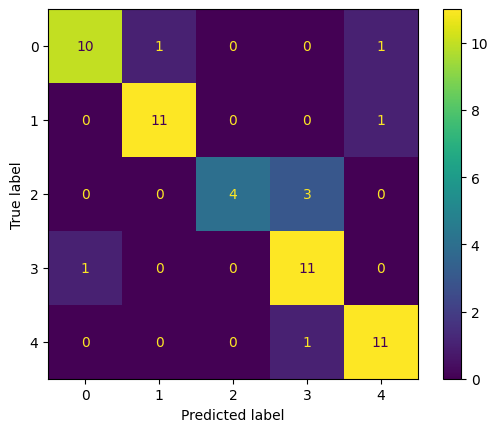

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print(cm_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mnb)
disp.plot()
plt.show()

SVM

In [ ]:
clf_svm_svc = svm.SVC()
grid_params_ = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

clf_svm = GridSearchCV(estimator=clf_svm_svc, param_grid=grid_params_, cv=5)
clf_svm.fit(X_train_tfidf, y_train)

print("Parameter terbaik SVM: ", clf_svm.best_params_)

Parameter terbaik SVM:  {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
clf_svm_svc = svm.SVC(C = 10, kernel = 'sigmoid', degree = 1, gamma = 'scale')
clf_svm_svc.fit(X_train_tfidf, y_train)

y_pred_svm = clf_svm_svc.predict(X_test_tfidf)

print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.92      0.92      0.92        12
           3       1.00      0.43      0.60         7
           4       0.73      0.92      0.81        12
           5       0.75      1.00      0.86        12

    accuracy                           0.82        55
   macro avg       0.86      0.79      0.79        55
weighted avg       0.84      0.82      0.81        55



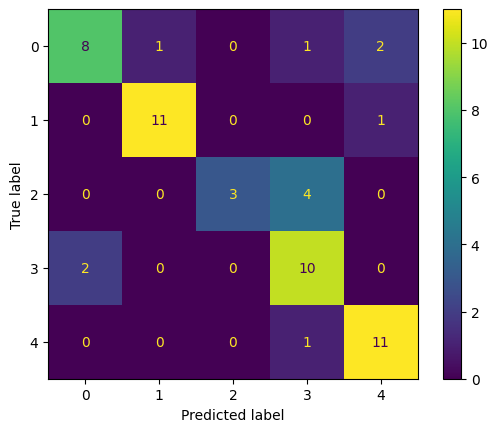

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()

K-NN

In [ ]:
# K-NN
clf_knn = KNeighborsClassifier()
grid_params = {
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'minkowski']
}
clf = GridSearchCV(clf_knn, param_grid=grid_params)
clf.fit(X_train_tfidf, y_train)
print("Parameter terbaik K-NN: ", clf.best_params_)

Parameter terbaik K-NN:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance', metric='euclidean')
clf_knn.fit(X_train_tfidf, y_train)

y_pred_knn = clf_knn.predict(X_test_tfidf)
# print(y_pred_knn)

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.64      0.75      0.69        12
           2       0.92      0.92      0.92        12
           3       1.00      0.57      0.73         7
           4       0.88      0.58      0.70        12
           5       0.71      1.00      0.83        12

    accuracy                           0.78        55
   macro avg       0.83      0.76      0.77        55
weighted avg       0.81      0.78      0.78        55



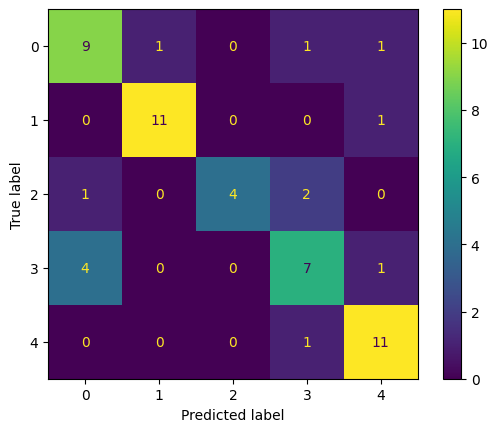

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

Cross Validation

In [ ]:
models = [svm.SVC(C = 10, kernel = 'sigmoid', degree = 1, gamma = 'scale'), MultinomialNB(alpha= 0.01, fit_prior= False), KNeighborsClassifier(n_neighbors=5, weights = 'uniform', metric='euclidean')]
entries = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, y_train, scoring='accuracy', cv=cv)
    for fold_idx, accuracy in enumerate(accuracies):
      entries.append((model_name, fold_idx, accuracy))

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.92      0.92      0.92        12
           3       1.00      0.43      0.60         7
           4       0.73      0.92      0.81        12
           5       0.75      1.00      0.86        12

    accuracy                           0.82        55
   macro avg       0.86      0.79      0.79        55
weighted avg       0.84      0.82      0.81        55

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.92      0.92      0.92        12
           3       1.00      0.57      0.73         7
           4       0.69      0.92      0.79        12
           5       0.85      0.92      0.88        12

    accuracy                           0.84        55
   macro avg       0.87      0.81      0.83        55
weighted avg       0.86      0.84      0.83        55

              precisio

## save model

In [ ]:
import joblib

In [ ]:
model_mnb = 'finalized_model.sav'
joblib.dump(clf_mnb, 'model_mnb_baru')

In [ ]:
from google.colab import files
files.download('model_mnb_baru')